# Music Genre Classification

In this project, you will build a machine learning algorithm to classify music genres using audio features. Starting with the provided dataset, your task is to develop a model that effectively solves this multiclass classification problem. Use the baseline notebook as a starting point and improve upon it.

# Introduction

In this project, you will work with a dataset of music samples from various genres. The dataset has been purposely left a bit messy, with some entries missing labels and others containing empty audio files. Your task is to clean and explore the dataset, turning it into a well-organized resource for analysis.

This notebook includes a basic and weak baseline to get you started. It serves as a simple starting point, but it is neither thorough nor accurate. You are expected to build upon it, applying your own strategies to improve data quality and model performance.

The formal details of the assignment will be provided at the end of the notebook. To start with, focus on understanding the dataset and planning your approach to tackle its challenges.

**We expect you to submit a modified version of this notebook with your improvements. Please download a copy of this assignment in your private COLAB accout before making your changes.**

## Assignment

**Please use only the provided dataset: no external datasets are allowed.**

**The solution notebook MUST run without errors when executing all cells.**

Focus only on classical machine learning algorithms available in *sklearn* for your analysis, other than artificial neural networks.

You are welcome to make models based on artificial neural networks too, but these will not be evaluated.

### Tasks

1. **Data Visualization and Exploration**:
   - Visualize and analyze the dataset to gain insights into the distribution and characteristics of different features.

2. **Handle Unlabeled and Irrelevant Data**:
   - Investigate the dataset for unlabeled data.
   - Filter out irrelevant audios, especially those that are just zero signals or contain no meaningful information.

3. **Feature Engineering**:
   - Experiment with adding new features or refining existing ones.
   - Adjust feature extraction parameters to better capture the characteristics of the audio samples.

4. **Apply Different Machine Learning Algorithms**:
   - Try various machine learning algorithms (e.g., Random Forest, SVM, Gradient Boosting\*) to improve performance.
   - Evaluate the models not only based on the **average accuracy**, but also consider the confusion matrix along with other **per-class** evaluation.
   - Explain which metrics are important for evaluating model performance, based on your findings from the exploratory data analysis.


\**Gradient Boosting is commonly implemented using specialized libraries like XGBoost, CatBoost, or LightGBM.*

## Assignment Evaluation Criteria (maximum 100%)

1. **Data Handling and Preprocessing (20 points)**
2. **Exploratory Data Analysis (10 points)**
3. **Feature Engineering (15 points)**
4. **Model Selection and Evaluation (15 points)**
5. **Model Comparison (10 points)**
6. **Clarity, Creativity, and Originality (30 points)**



## Assignment submission instructions
Complete the assignment in your own copy of the notebook. Ensure that your notebook is runnable and free of errors. Once finished, download the **.ipynb** file and upload it to the Teams Assignment section.

**The deadline is one month from today.**

## Baseline

Let's install all required dependencies:

- **datasets**: Access to large-scale datasets.
- **librosa**: Tools for audio analysis.
- **pandas** & **numpy**: Tabular data manipulation and numerical operations.
- **scikit-learn**: Machine learning algorithms and tools.
- **tqdm**: Progress bar.

You might be familiar with most of these already.

In [1]:
%%capture
!pip install datasets librosa pandas numpy scikit-learn tqdm

And import the modules

In [2]:
import numpy as np
import pandas as pd
import librosa
from datasets import load_dataset
from IPython.display import Audio, display
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset
%matplotlib inline

### Dataset Description

The dataset consists of music samples from various genres, including:

- **Genres**: `Blues`, `Classical`, `Country`, `Disco`, `HipHop`, `Jazz`, `Metal`, `Pop`, `Reggae`, and `Rock`.

The dataset is a bit messy and includes some **unlabeled data** and **empty audio files**. We have provided basic preprocessing, but more in-depth data cleaning, feature extraction, and preparation will be a part of your assignment.

Let's download the audio dataset using the Hugging Face datasets library.

In [3]:
dataset = load_dataset("unibz-ds-course/audio_assignment", split="train", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/643 [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/309M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/318M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1230 [00:00<?, ? examples/s]

In [4]:
print(f"Num of samples in the dataset: {len(dataset)}")

Num of samples in the dataset: 1230


Let's take a glance at a sample from the dataset

In [5]:
entry = dataset[10]

audio_array = entry['audio']['array']
sampling_rate = entry['audio']['sampling_rate']

print(f"Element: {entry}")
print(f"File Path: {entry['file']}")
print(f"Number of Samples: {len(audio_array)}")
print(f"Sampling Rate: {sampling_rate} Hz")

audio_length_seconds = len(audio_array) / sampling_rate
print(f"Audio Length: {audio_length_seconds:.2f} seconds")

genre_id = entry['genre']
genre_label = dataset.features['genre'].int2str(genre_id)
print(f"Genre (ID): {genre_id}")
print(f"Genre (Label): {genre_label}")
display(Audio(audio_array, rate=sampling_rate))

Element: {'file': 'audio_data/country/country.00247.wav', 'audio': {'path': 'country.00247.wav', 'array': array([-0.01055908, -0.01712036, -0.02111816, ...,  0.03747559,
        0.01239014, -0.03366089]), 'sampling_rate': 22050}, 'genre': 2}
File Path: audio_data/country/country.00247.wav
Number of Samples: 661794
Sampling Rate: 22050 Hz
Audio Length: 30.01 seconds
Genre (ID): 2
Genre (Label): country


## Data cleaning

In [6]:
print("Type of dataset:", type(dataset))

Type of dataset: <class 'datasets.arrow_dataset.Dataset'>


In [7]:
dataset

Dataset({
    features: ['file', 'audio', 'genre'],
    num_rows: 1230
})

In [8]:
dataset.info

DatasetInfo(description='', citation='', homepage='', license='', features={'file': Value(dtype='string', id=None), 'audio': Audio(sampling_rate=22050, mono=True, decode=True, id=None), 'genre': ClassLabel(names=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], id=None)}, post_processed=None, supervised_keys=None, builder_name='parquet', dataset_name='audio_assignment', config_name='default', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=1628392059, num_examples=1230, shard_lengths=[408, 408, 407, 7], dataset_name='audio_assignment')}, download_checksums={'hf://datasets/unibz-ds-course/audio_assignment@6f01e8fb5dbb76257ea3b2ace6ed5bdaf9651646/data/train-00000-of-00004.parquet': {'num_bytes': 311790604, 'checksum': None}, 'hf://datasets/unibz-ds-course/audio_assignment@6f01e8fb5dbb76257ea3b2ace6ed5bdaf9651646/data/train-00001-of-00004.parquet': {'num_bytes': 336346471, 'checksum': None}, 'hf://datasets/unibz-ds-course/aud

In [9]:
# Function to check if an audio file is valid
def is_valid_audio(example):
    audio_array = example['audio']['array']
    # Check if audio file is not empty and has more than just zero values
    return len(audio_array) > 0 and audio_array.any()

# Function to check if the genre is labeled
def is_labeled(example):
    return example['genre'] is not None and example['genre'] != ''

# Combine both validation checks
def filter_dataset(example):
    return is_valid_audio(example) and is_labeled(example)

# Apply the filter to clean the dataset
cleaned_dataset = dataset.filter(filter_dataset)

# Display cleaned dataset info
print(cleaned_dataset)


Filter:   0%|          | 0/1230 [00:00<?, ? examples/s]

Dataset({
    features: ['file', 'audio', 'genre'],
    num_rows: 848
})


The code performs three primary tasks:
- checking audio validity,
- verifying the presence of genre labels, and
- applying these checks to clean the dataset.



The function `is_valid_audio` determines if an audio file within a dataset sample is valid. This validation consists of two checks:

`Non-Empty`: Ensures the audio_array is not empty by confirming it has a length greater than zero. An empty array could indicate missing or corrupted audio data.

`Non-Zero Values`: Uses `.any()` to verify that the array contains values other than zero, which helps identify files that are silent or contain only zero values (indicating no actual audio content). This function improves the quality of the dataset by removing empty or silent audio files, which are unlikely to contribute meaningful information in an audio-based model.

The `is_labeled` function checks that the genre field in each dataset sample is properly labeled. This function does two things:

`Non-Null Check`: Confirms that the genre label is not None, meaning a label exists for the sample.

`Non-Empty String Check`: Verifies that the label is not an empty string, avoiding samples where the genre field might be present but left blank. Including only labeled samples ensures that each audio file has a corresponding genre classification, which is essential for supervised learning tasks that rely on labeled data.

The `filter_dataset` function applies both `is_valid_audio` and `is_labeled` checks to each example in the dataset. This approach ensures that only samples meeting both criteria—valid audio and labeled genre—are retained for further use. Combining these checks into a single function makes the code modular, clean, and efficient for applying complex validation logic.

## Data exploration

The Data exploration will focus on inspecting the core characteristic of the dataset. The first step is examining genre feature mapping and genre distribution, which provide insights into the variety and balance of music genres within the dataset.
Next, analyzing the audio length distribution offers information on variations in audio duration that can affect feature extraction, model training, and evaluation.
A visualization of audio waveform for each genre allows for a closer look at the raw data structure, revealing details about audio dynamics and signal characteristics that can be valuable for feature engineering.

### Look at the genre feature mapping

In [10]:
# Access the genre feature mapping
genre_feature = cleaned_dataset.features['genre']

# Get the internal mapping from integer to string (ID -> label)
genre_mapping = {i: genre_feature.int2str(i) for i in range(genre_feature.num_classes)}

# Print the mapping
print("Genre ID to Label Mapping:")
for genre_id, genre_label in genre_mapping.items():
    print(f"{genre_id}: {genre_label}")


Genre ID to Label Mapping:
0: blues
1: classical
2: country
3: disco
4: hiphop
5: jazz
6: metal
7: pop
8: reggae
9: rock


### Genre Distribution

<ipython-input-11-858cb22e4931>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="magma")


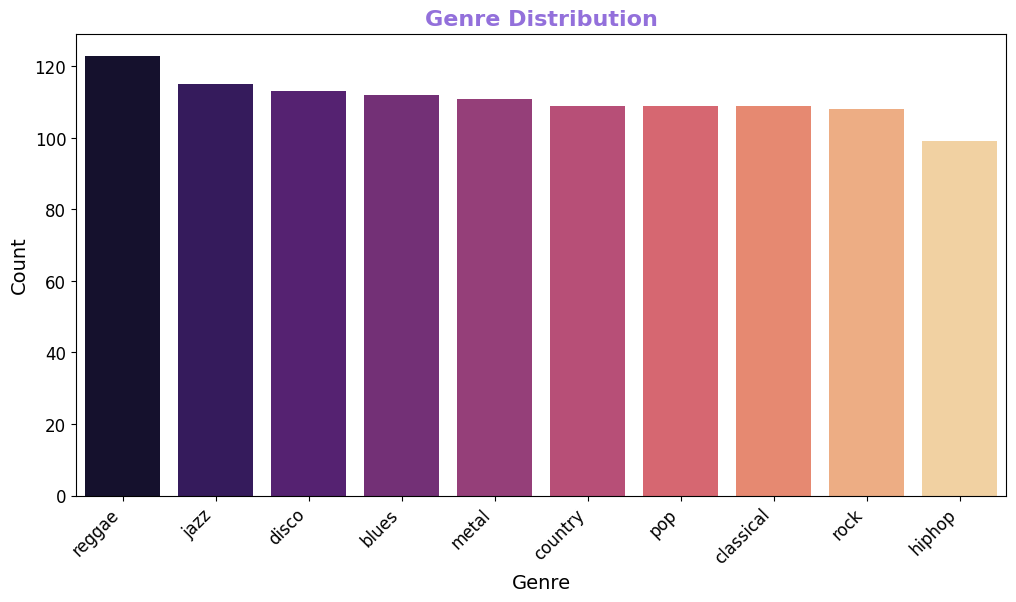

In [11]:
# Get the genre feature and mapping from ID to string label
genre_feature = dataset.features['genre']
genre_mapping = {i: genre_feature.int2str(i) for i in range(genre_feature.num_classes)}

# Convert dataset to a pandas DataFrame for easier manipulation
genre_df = pd.DataFrame(dataset['genre'], columns=['genre'])

# Map the integer genre IDs to their string labels
genre_df['genre_label'] = genre_df['genre'].map(genre_mapping)

# Count the number of occurrences of each genre label
genre_counts = genre_df['genre_label'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="magma")
plt.title('Genre Distribution', fontsize=16, weight='bold', color='mediumpurple')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Audio Length Distribution

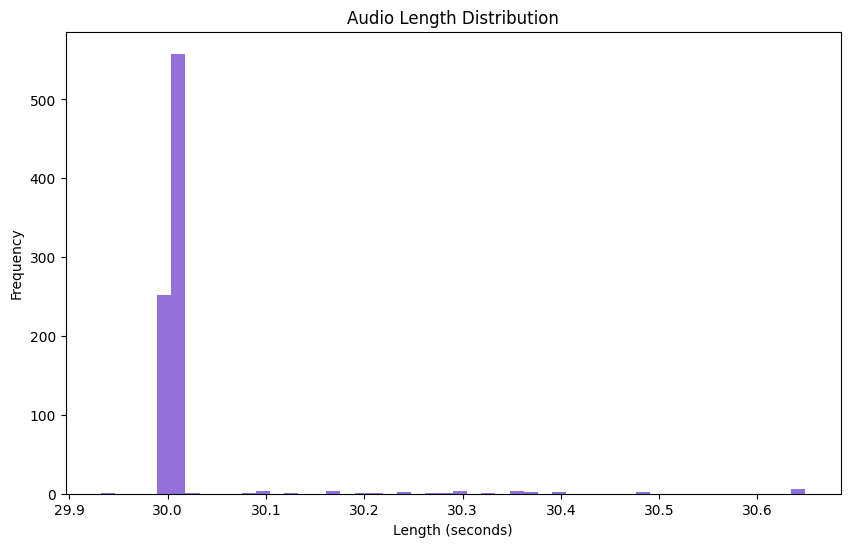

In [12]:
# Calculate the audio lengths (in seconds) for each audio file
audio_lengths = [len(audio['array']) / audio['sampling_rate'] for audio in cleaned_dataset['audio']]

plt.figure(figsize=(10, 6))
plt.hist(audio_lengths, bins=50, color='mediumpurple')
plt.title('Audio Length Distribution')
plt.xlabel('Length (seconds)')
plt.ylabel('Frequency')
plt.show()


### Visualize an Audio Waveform

Filter:   0%|          | 0/848 [00:00<?, ? examples/s]

Filter:   0%|          | 0/848 [00:00<?, ? examples/s]

Filter:   0%|          | 0/848 [00:00<?, ? examples/s]

Filter:   0%|          | 0/848 [00:00<?, ? examples/s]

Filter:   0%|          | 0/848 [00:00<?, ? examples/s]

Filter:   0%|          | 0/848 [00:00<?, ? examples/s]

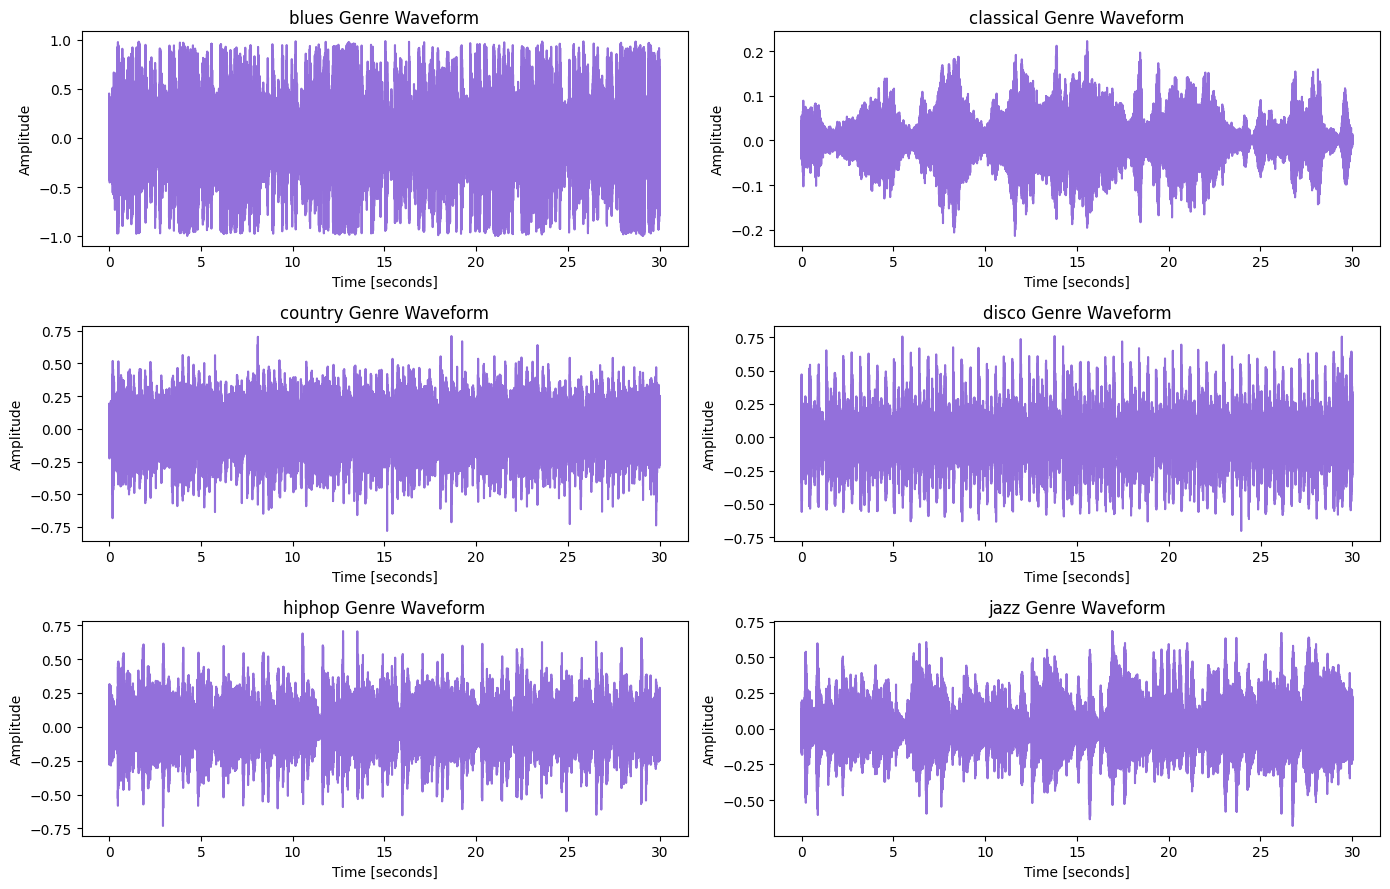

In [13]:
genre_feature = dataset.features['genre']
genre_mapping = {i: genre_feature.int2str(i) for i in range(genre_feature.num_classes)}

genre_df = pd.DataFrame(dataset['genre'], columns=['genre'])
genre_df['genre_label'] = genre_df['genre'].map(genre_mapping)

def plot_genre_waveforms_grid(dataset, genre_mapping, max_genres=6):
    genres = list(genre_mapping.values())[:max_genres]  # Limit to a max number of genres if needed
    n_genres = len(genres)

    n_cols = 2
    n_rows = (n_genres + 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
    axs = axs.flatten()

    for i, genre_label in enumerate(genres):
        genre_id = list(genre_mapping.keys())[list(genre_mapping.values()).index(genre_label)]

        genre_example = dataset.filter(lambda x: x['genre'] == genre_id).shuffle(seed=42).select([0])[0]

        # Extract audio array and sampling rate
        audio_array = genre_example['audio']['array']
        sampling_rate = genre_example['audio']['sampling_rate']

        # Plot the waveform in the subplot
        time = np.linspace(0., len(audio_array) / sampling_rate, num=len(audio_array))
        color = 'mediumpurple'
        axs[i].plot(time, audio_array, color=color)
        axs[i].set_title(f"{genre_label} Genre Waveform")
        axs[i].set_xlabel('Time [seconds]')
        axs[i].set_ylabel('Amplitude')

    # Hide any extra subplots that aren't used
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

# Plot waveforms for each genre
plot_genre_waveforms_grid(cleaned_dataset, genre_mapping)


### Overall Summary of Dataset

In [14]:
# Number of entries in the dataset
num_entries = len(cleaned_dataset)

# Count the number of occurrences of each genre label
genre_counts = genre_df['genre_label'].value_counts()

# Average audio length
average_audio_length = np.mean(audio_lengths)

# Summary report
print(f"Total Number of Entries: {num_entries}")
print(f"Genre Distribution:\n{genre_counts}")
print(f"Average Audio Length: {average_audio_length:.2f} seconds")

Total Number of Entries: 848
Genre Distribution:
genre_label
reggae       123
jazz         115
disco        113
blues        112
metal        111
country      109
pop          109
classical    109
rock         108
hiphop        99
Name: count, dtype: int64
Average Audio Length: 30.02 seconds


The data exploration shows that the dataset is consistent across important areas, like genre distribution, audio length, and labeling accuracy. This consistency means the data is balanced and reliable, with no major issues that could impact model training.
With the data well-structured and stable, the dataset is ready for the next step: feature extraction. This next phase will focus on pulling out key details from the audio data that will be useful for building effective models.

## Feature extraction

### **Mel Frequency Cepstral Coefficients**

**[Mel Frequency Cepstral Coefficients (MFCCs)](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)** are commonly used in audio analysis to capture key features of sound. They help represent the important characteristics of an audio signal, making them ideal for tasks like music genre classification and speech recognition.

We're not going to dive deep into the complex details of audio processing, but it's useful to know that MFCCs help simplify raw audio data while retaining important information.

#### Basic Steps in MFCC Extraction:
1. **Frequency Domain Conversion**: The audio signal is split into short frames, and we apply the Fourier Transform to convert it from the time domain to the frequency domain.
2. **Mel Scale Mapping**: The frequency spectrum is converted to the Mel scale, which better represents how humans perceive sound, emphasizing lower frequencies.
3. **Logarithm and DCT**: After mapping to the Mel scale, we apply a logarithm and the Discrete Cosine Transform (DCT) to get the MFCCs. These summarize the "cepstral" information of the audio signal.

The parameter `n_mfcc` controls **how many MFCC coefficients** are extracted for each frame. For example, setting `n_mfcc=8` means we extract 8 coefficients, where lower coefficients capture broad audio features, and higher coefficients capture finer details.

#### Why MFCCs Are Important:
MFCCs help capture the **tonal quality** of the sound and reduce the complexity of the raw audio signal. By summarizing the audio into a smaller set of features, they allow machine learning models to classify and recognize different types of sounds more effectively.

In this notebook, we'll use the **mean** and **variance** of the MFCCs over time to create a robust feature set for our classification model. Adjusting the `n_mfcc` parameter allows us to control the number of features extracted for each audio sample.

#### **Additional Features**
Consider exploring additional audio features to enhance your model's performance. There are various acoustic properties you could extract from the audio signals, such as zero crossings, harmonic-percussive separation, tempo, spectral centroids, spectral rolloff, chromagram, RMS energy, and spectral bandwidth. When working with these features, it's often useful to compute summary statistics like the mean and variance across the audio sample. These summary statistics can capture the overall characteristics and variability of the feature, reducing the dimensionality of your data while retaining important information. Experimenting with these features and their statistical summaries could potentially improve your model's accuracy and robustness in distinguishing between different audio characteristics.

In [15]:
def extract_mfcc(dataset, n_mfcc):
    mfcc_features = []

    # here we might have used Dataset.map method, unfortunately, it consumes extra memory and runs out of RAM in colab
    for entry in tqdm(dataset, desc="Extracting Mffc features"):
        audio_array = entry['audio']['array']
        sampling_rate = entry['audio']['sampling_rate']

        mfcc = librosa.feature.mfcc(y=audio_array, sr=sampling_rate, n_mfcc=n_mfcc)

        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)

        feature_dict = {}

        for i in range(n_mfcc):
            feature_dict[f'mfcc_mean{i+1}'] = mfcc_mean[i]

        for i in range(n_mfcc):
            feature_dict[f'mfcc_var{i+1}'] = mfcc_var[i]

        feature_dict['genre'] = entry['genre']

        mfcc_features.append(feature_dict)

    return mfcc_features

### MFFC correlation matrix

<ipython-input-15-e21ccb97c447>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for entry in tqdm(dataset, desc="Extracting Mffc features"):


Extracting Mffc features:   0%|          | 0/1230 [00:00<?, ?it/s]

<ipython-input-15-e21ccb97c447>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for entry in tqdm(dataset, desc="Extracting Mffc features"):


Extracting Mffc features:   0%|          | 0/1230 [00:00<?, ?it/s]

<ipython-input-15-e21ccb97c447>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for entry in tqdm(dataset, desc="Extracting Mffc features"):


Extracting Mffc features:   0%|          | 0/1230 [00:00<?, ?it/s]

<ipython-input-15-e21ccb97c447>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for entry in tqdm(dataset, desc="Extracting Mffc features"):


Extracting Mffc features:   0%|          | 0/1230 [00:00<?, ?it/s]

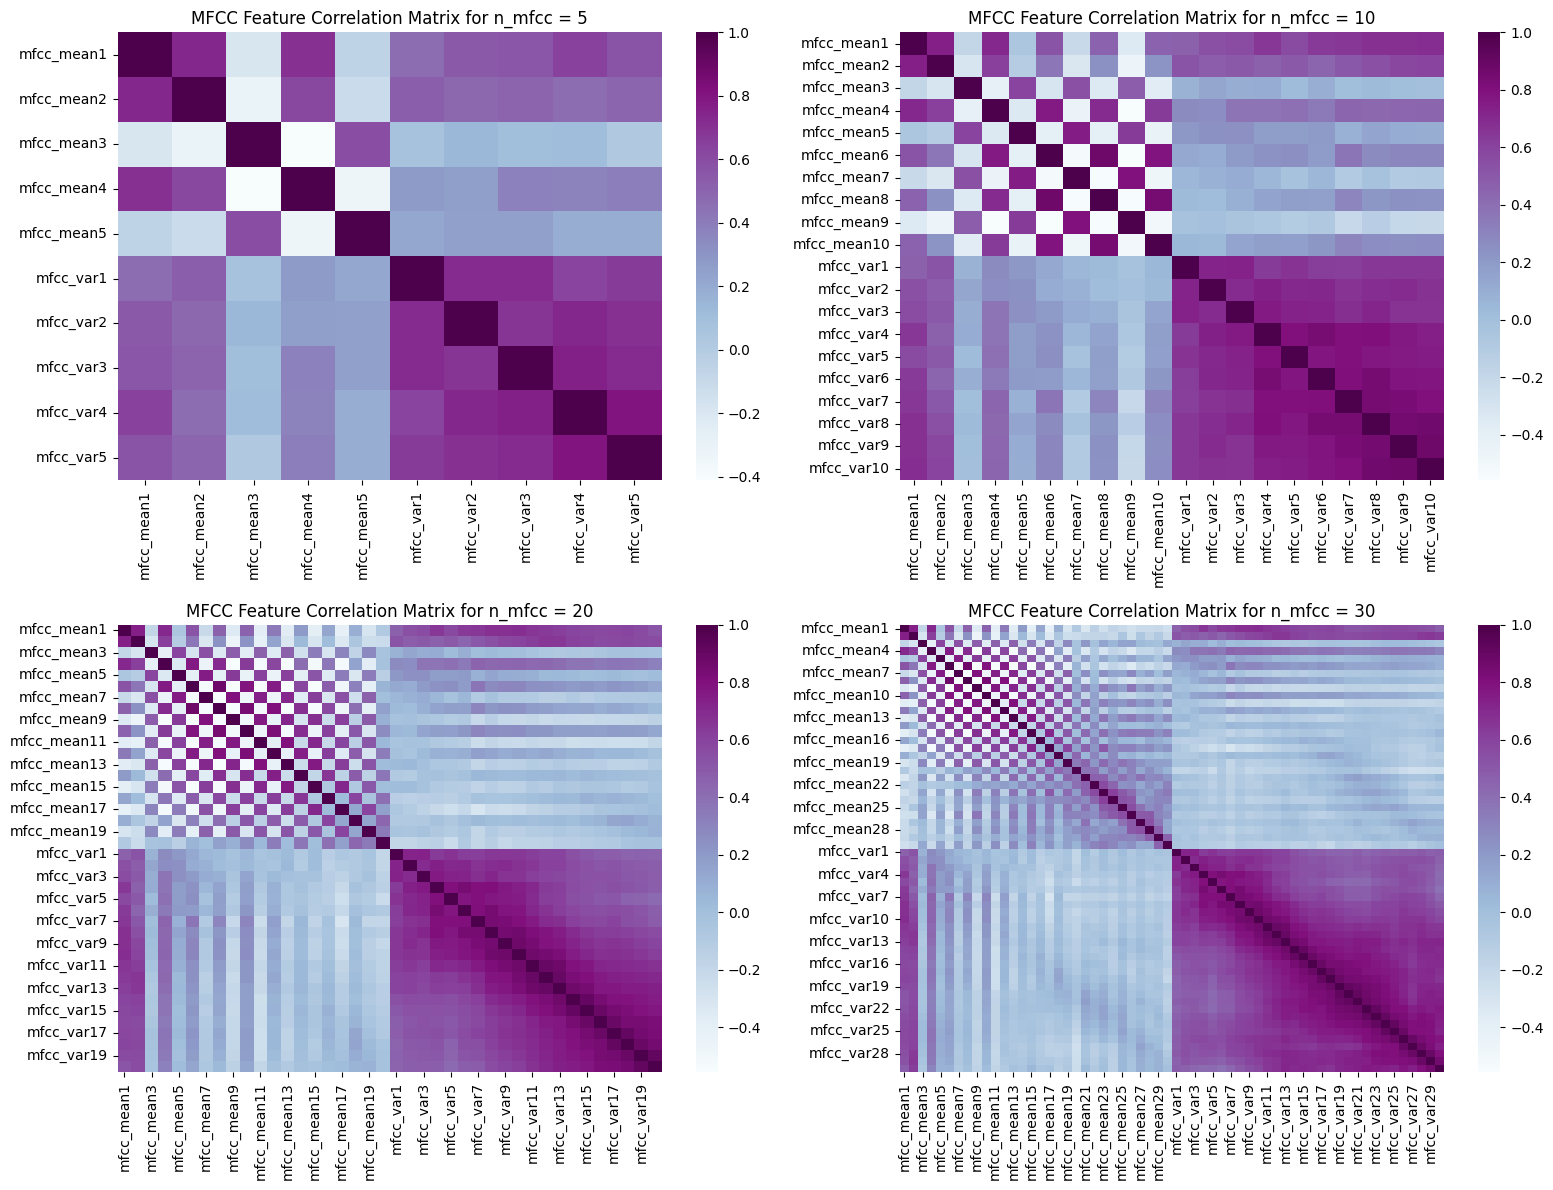

In [16]:
def analyze_mfcc_correlation(dataset, n_mfcc_values):

     #Determine grid layout (2 rows, 2 columns for 4 plots)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()  # Flatten to easily iterate over axes


    # Loop through different values of n_mfcc
    for i, n_mfcc in enumerate(n_mfcc_values):
        # Step 1: Extract features
        mfcc_features = extract_mfcc(dataset, n_mfcc)

        # Step 2: Convert to DataFrame
        df = pd.DataFrame(mfcc_features)

        # Drop the genre column for correlation analysis, as it's not numeric
        feature_df = df.drop(columns=['genre'])

        # Step 3: Calculate correlation matrix
        corr_matrix = feature_df.corr()

        # Step 4: Visualize the correlation matrix
        sns.heatmap(corr_matrix, annot=False, cmap='BuPu', fmt='.1f', ax=axes[i])
        axes[i].set_title(f"MFCC Feature Correlation Matrix for n_mfcc = {n_mfcc}")

    # Adjust layout to prevent overlapping titles and labels
    plt.tight_layout()
    plt.show()

n_mfcc_values = [5, 10, 20, 30]
analyze_mfcc_correlation(dataset, n_mfcc_values)


### Extrating  additional features

To perform a better audio analysis on the dataset other than MFCC it's better to add additional features such as:

### Zero-Crossing Rate (ZCR):

The ZCR represents the rate at which the signal changes sign (crosses the zero line). It's often used to analyze the noisiness or percussive quality of an audio signal.

### Harmonic-Percussive Separation (HPS):

Harmonic and percussive separation decomposes an audio signal into harmonic and percussive components. The harmonic part typically includes tonal sounds like instruments, while the percussive part contains drum beats and other transient sounds.

### Tempo:

Tempo represents the perceived speed or pace of the audio, measured in beats per minute (BPM). It's computed from the onset envelope of the audio.

### Spectral Centroid:

The spectral centroid indicates the center of mass of the frequency spectrum and is often related to the "brightness" of a sound.

### Spectral Rolloff:

The spectral rolloff is the frequency below which a specified percentage (typically 85%) of the spectral energy is concentrated. It often indicates the high-frequency content.

### Chromagram:

A chromagram captures the intensity of each pitch class (like C, D, E, etc.) and is widely used in music analysis, especially for identifying harmony and chords.

### RMS Energy:

RMS (Root Mean Square) energy represents the amplitude energy of the signal over time, indicating the loudness or dynamics of the audio.

### Spectral Bandwidth:

Spectral bandwidth measures the width of the spectrum and is related to the spread of frequencies, often associated with the "fullness" of a sound.

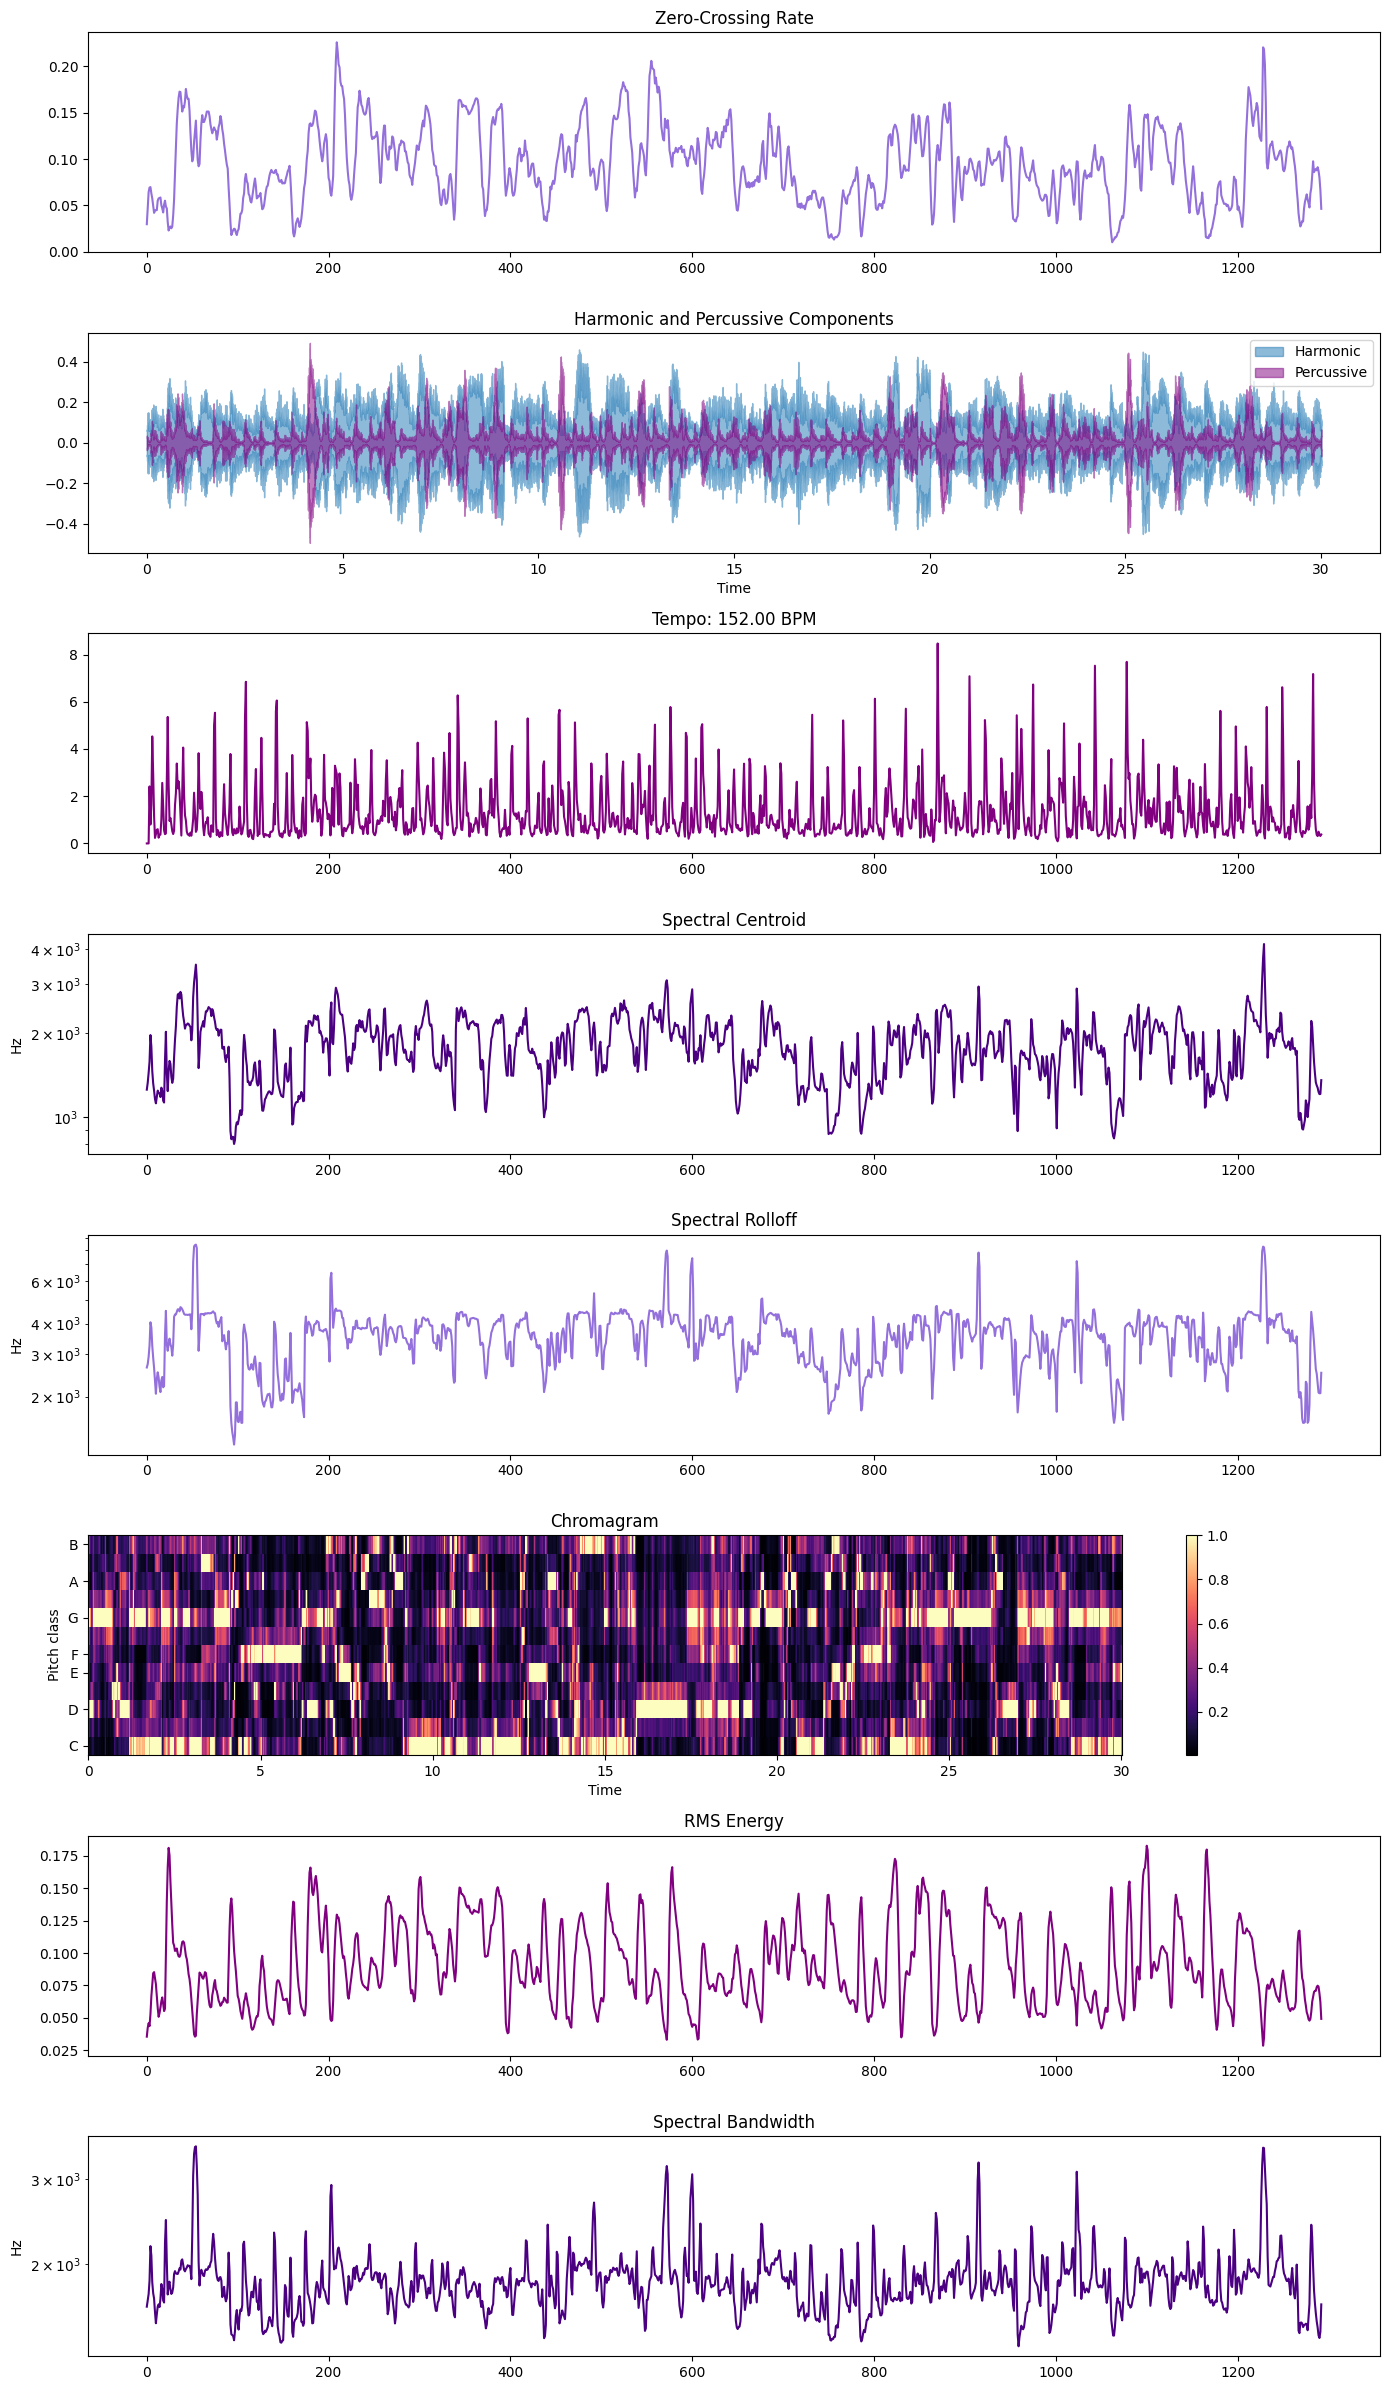

In [25]:
# Load audio file
audio_array = entry['audio']['array']

# 2. Zero-Crossing Rate
zcr = librosa.feature.zero_crossing_rate(audio_array)[0]

# 3. Harmonic-Percussive Separation
harmonic, percussive = librosa.effects.hpss(audio_array)

# 4. Tempo (using onset envelope)
onset_env = librosa.onset.onset_strength(y=audio_array, sr=sampling_rate)
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sampling_rate)

# Check if tempo is an array and take the first value if it is
if isinstance(tempo, np.ndarray):
    tempo = tempo[0]

# 5. Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=audio_array, sr=sampling_rate)[0]

# 6. Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_array, sr=sampling_rate)[0]

# 7. Chromagram
chromagram = librosa.feature.chroma_stft(y=audio_array, sr=sampling_rate)

# 8. RMS Energy
rms_energy = librosa.feature.rms(y=audio_array)[0]

# 9. Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_array, sr=sampling_rate)[0]

# Visualization
plt.figure(figsize=(14, 24))

# Plot Zero-Crossing Rate
plt.subplot(8, 1, 1)
plt.plot(zcr, color='mediumpurple')
plt.title("Zero-Crossing Rate")

# Plot Harmonic and Percussive components
plt.subplot(8, 1, 2)
librosa.display.waveshow(harmonic, sr=sampling_rate, alpha=0.5, label='Harmonic')
librosa.display.waveshow(percussive, sr=sampling_rate, color='purple', alpha=0.5, label='Percussive')
plt.title("Harmonic and Percussive Components")
plt.legend()

# Plot Tempo using onset envelope
plt.subplot(8, 1, 3)
plt.plot(onset_env, label='Onset Strength Envelope', color='purple')
plt.title(f"Tempo: {tempo:.2f} BPM")

# Plot Spectral Centroid
plt.subplot(8, 1, 4)
plt.semilogy(spectral_centroid, color='indigo')
plt.ylabel('Hz')
plt.title("Spectral Centroid")

# Plot Spectral Rolloff
plt.subplot(8, 1, 5)
plt.semilogy(spectral_rolloff, color='mediumpurple')
plt.ylabel('Hz')
plt.title("Spectral Rolloff")

# Plot Chromagram
plt.subplot(8, 1, 6)
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', sr=sampling_rate, cmap='magma')
plt.colorbar()
plt.title("Chromagram")

# Plot RMS Energy
plt.subplot(8, 1, 7)
plt.plot(rms_energy, color='purple')
plt.title("RMS Energy")

# Plot Spectral Bandwidth
plt.subplot(8, 1, 8)
plt.semilogy(spectral_bandwidth, color='indigo')
plt.ylabel('Hz')
plt.title("Spectral Bandwidth")

plt.tight_layout()
plt.show()

### Extracting the features

In [18]:
def extract_mfcc_features(dataset, n_mfcc=20):
    features = []

    # Iterating over the dataset and extracting features
    for entry in tqdm(dataset, desc="Extracting Audio Features"):
        audio_array = entry['audio']['array']
        sampling_rate = entry['audio']['sampling_rate']

        # 1. MFCCs (Mel-frequency cepstral coefficients)
        mfcc = librosa.feature.mfcc(y=audio_array, sr=sampling_rate, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)

        # 2. Zero-Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(audio_array)

        # 3. Harmonic-Percussive Separation
        harmonic, percussive = librosa.effects.hpss(audio_array)

        # 4. Tempo (using onset envelope)
        onset_env = librosa.onset.onset_strength(y=audio_array, sr=sampling_rate)
        tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sampling_rate)

        # 5. Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_array, sr=sampling_rate)

        # 6. Spectral Rolloff
        spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_array, sr=sampling_rate)

        # 7. Chromagram
        chromagram = librosa.feature.chroma_stft(y=audio_array, sr=sampling_rate)

        # 8. RMS Energy
        rms_energy = librosa.feature.rms(y=audio_array)

        # 9. Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_array, sr=sampling_rate)

        # Initializing the feature dictionary for each entry
        feature_dict = {}

        # MFCCs
        for i in range(n_mfcc):
            feature_dict[f'mfcc_mean{i+1}'] = mfcc_mean[i]
            feature_dict[f'mfcc_var{i+1}'] = mfcc_var[i]

        # Adding other features
        feature_dict['zcr_mean'] = np.mean(zcr)
        feature_dict['zcr_var'] = np.var(zcr)
        feature_dict['harmonic_mean'] = np.mean(harmonic)
        feature_dict['harmonic_var'] = np.var(harmonic)
        feature_dict['percussive_mean'] = np.mean(percussive)
        feature_dict['percussive_var'] = np.var(percussive)
        feature_dict['tempo'] = tempo
        feature_dict['spectral_centroid_mean'] = np.mean(spectral_centroid)
        feature_dict['spectral_centroid_var'] = np.var(spectral_centroid)
        feature_dict['spectral_rolloff_mean'] = np.mean(spectral_rolloff)
        feature_dict['spectral_rolloff_var'] = np.var(spectral_rolloff)
        feature_dict['chromagram_mean'] = np.mean(chromagram)
        feature_dict['chromagram_var'] = np.var(chromagram)
        feature_dict['rms_energy_mean'] = np.mean(rms_energy)
        feature_dict['rms_energy_var'] = np.var(rms_energy)
        feature_dict['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
        feature_dict['spectral_bandwidth_var'] = np.var(spectral_bandwidth)

        # Genre information
        feature_dict['genre'] = entry['genre']

        # Append the feature dictionary to the list
        features.append(feature_dict)

    return features

In [26]:
# Extract MFCC features from the first two columns of the cleaned dataset
mfcc_features = extract_mfcc_features(cleaned_dataset.select(range(2)), n_mfcc=20)

<ipython-input-18-6e53fc28d691>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for entry in tqdm(dataset, desc="Extracting Audio Features"):


Extracting Audio Features:   0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
mfcc_features=pd.DataFrame(mfcc_features)
mfcc_features.head()

,mfcc_mean1,mfcc_var1,mfcc_mean2,mfcc_var2,mfcc_mean3,mfcc_var3,mfcc_mean4,mfcc_var4,mfcc_mean5,mfcc_var5,...,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chromagram_mean,chromagram_var,rms_energy_mean,rms_energy_var,spectral_bandwidth_mean,spectral_bandwidth_var,genre
0,-69.836278,2341.101347,124.207701,580.461335,-32.482371,329.799566,47.689801,167.005379,1.400885,125.102031,...,324963.277009,3504.999275,1.321724e+06,0.325757,0.085928,0.218017,0.003456,1861.949728,118514.926219,2
1,-191.643297,3301.314391,41.318241,403.273174,5.013655,447.922087,65.453821,220.996266,-4.320506,210.413597,...,426097.673331,6278.460849,3.038536e+05,0.476643,0.079741,0.067212,0.001955,2603.879338,28927.138204,4


## Train a classifier

Let's import all necessary functions and classes from sklearn

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, LeaveOneOut
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

### Extract features dataset from cleaned audio dataset

In [22]:
def prepare_dataset(dataset, n_mfcc):
    mfcc_dataset_flattened = extract_mfcc_features(cleaned_dataset, n_mfcc=n_mfcc)

    # here you might want to add other features
    df = pd.DataFrame(mfcc_dataset_flattened)

    X = df.drop(columns=['genre'])
    y = df['genre']

    return X, y

### Prepare train and test data

In [24]:
X, y = prepare_dataset(cleaned_dataset, n_mfcc=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-18-6e53fc28d691>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for entry in tqdm(dataset, desc="Extracting Audio Features"):


Extracting Audio Features:   0%|          | 0/848 [00:00<?, ?it/s]

The best practice is to use a pipeline because it allows us to streamline preprocessing steps (like scaling) and model training into a single workflow. This ensures that all steps are applied consistently during both training and testing, preventing data leakage and simplifying cross-validation and hyperparameter tuning.

### Compare classifiers

#### Set Up Multiple Classifiers

In this section, we will define and experiment with several machine learning algorithms to assess their performance on our dataset. To ensure consistency throughout our evaluations, we will utilize a pipeline. The algorithms we will compare include Logistic Regression, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). By examining the strengths and weaknesses of each classifier, we aim to determine the most effective model for our specific application.


Classifier: Logistic Regression
Accuracy on Test Set: 0.72353
Cross-Validation (5-Fold) Accuracy: 0.71932
Leave-One-Out (LOO) Accuracy: 0.72524
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        23
           1       1.00      0.86      0.92        21
           2       0.67      0.75      0.71        16
           3       0.62      0.67      0.65        15
           4       0.75      0.75      0.75        16
           5       0.76      0.89      0.82        18
           6       0.74      0.88      0.80        16
           7       0.88      0.74      0.80        19
           8       0.67      0.67      0.67        12
           9       0.33      0.43      0.38        14

    accuracy                           0.72       170
   macro avg       0.72      0.72      0.72       170
weighted avg       0.74      0.72      0.73       170



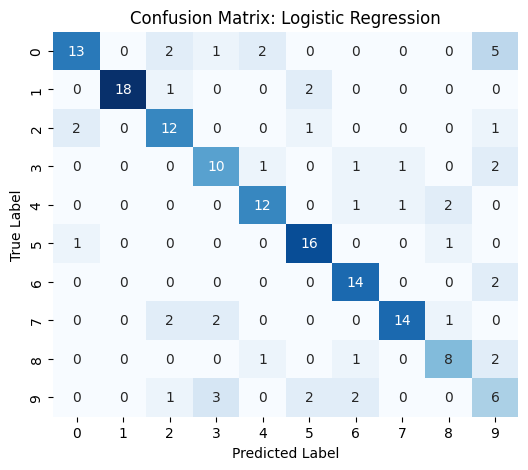


Classifier: Random Forest
Accuracy on Test Set: 0.67059
Cross-Validation (5-Fold) Accuracy: 0.70397
Leave-One-Out (LOO) Accuracy: 0.70755
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        23
           1       0.84      0.76      0.80        21
           2       0.54      0.44      0.48        16
           3       0.53      0.53      0.53        15
           4       0.75      0.75      0.75        16
           5       0.65      0.83      0.73        18
           6       0.74      0.88      0.80        16
           7       0.81      0.68      0.74        19
           8       0.53      0.75      0.62        12
           9       0.54      0.50      0.52        14

    accuracy                           0.67       170
   macro avg       0.66      0.67      0.66       170
weighted avg       0.68      0.67      0.67       170



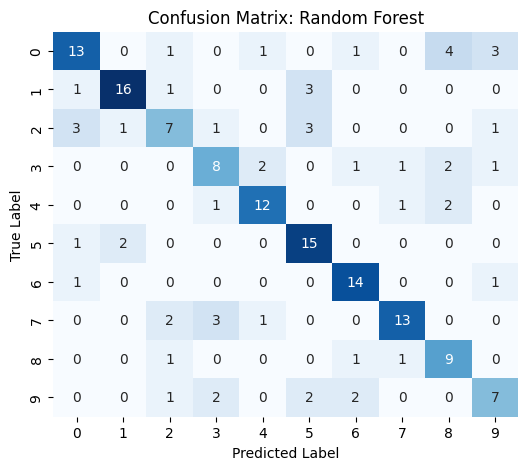


Classifier: SVM
Accuracy on Test Set: 0.76471
Cross-Validation (5-Fold) Accuracy: 0.72876
Leave-One-Out (LOO) Accuracy: 0.74882
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.95      1.00      0.98        21
           2       0.76      0.81      0.79        16
           3       0.59      0.67      0.62        15
           4       0.80      0.75      0.77        16
           5       0.89      0.94      0.92        18
           6       0.76      0.81      0.79        16
           7       0.93      0.68      0.79        19
           8       0.50      0.67      0.57        12
           9       0.53      0.57      0.55        14

    accuracy                           0.76       170
   macro avg       0.76      0.76      0.75       170
weighted avg       0.78      0.76      0.77       170



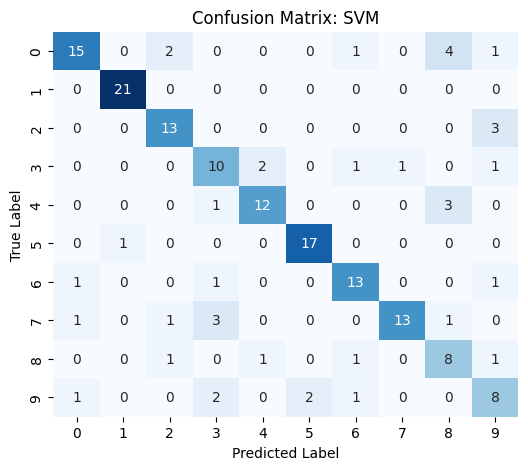


Classifier: K-Nearest Neighbors
Accuracy on Test Set: 0.69412
Cross-Validation (5-Fold) Accuracy: 0.65565
Leave-One-Out (LOO) Accuracy: 0.68042
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.83      0.90      0.86        21
           2       0.52      0.81      0.63        16
           3       0.56      0.60      0.58        15
           4       0.73      0.69      0.71        16
           5       0.75      0.67      0.71        18
           6       0.75      0.75      0.75        16
           7       0.87      0.68      0.76        19
           8       0.36      0.33      0.35        12
           9       0.57      0.57      0.57        14

    accuracy                           0.69       170
   macro avg       0.68      0.67      0.67       170
weighted avg       0.71      0.69      0.70       170



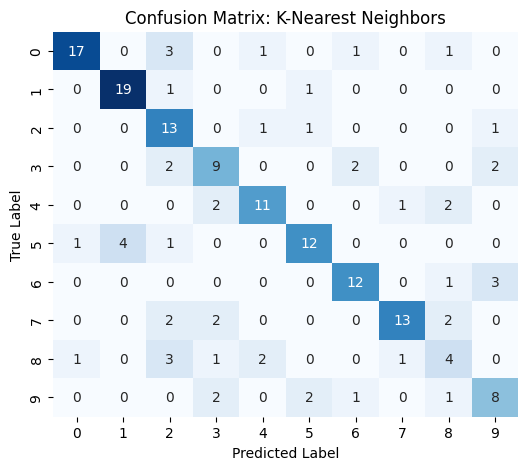

In [28]:
# Define different classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store results
results = {}

# Function to plot Confusion Matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Iterate through classifiers, train, and evaluate
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling features
        ('classifier', clf)
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5)

    # Perform Leave-One-Out cross-validation
    loo = LeaveOneOut()
    loo_scores = cross_val_score(pipeline, X, y, cv=loo)
    loo_accuracy = np.mean(loo_scores)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cross_val_accuracy': cv_scores.mean(),
        'loo_accuracy': loo_accuracy,
        'classification_report': classification_report(y_test, y_pred, zero_division=1, output_dict=True),
        'confusion_matrix': conf_matrix
    }

    # Print out results for each classifier
    print(f"\nClassifier: {name}")
    print(f"Accuracy on Test Set: {accuracy:.5f}")
    print(f"Cross-Validation (5-Fold) Accuracy: {cv_scores.mean():.5f}")
    print(f"Leave-One-Out (LOO) Accuracy: {loo_accuracy:.5f}")
    print(classification_report(y_test, y_pred, zero_division=1))

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, name)

After comparing the performance of several classifiers, Logistic Regression demonstrated the most promising results, making it the primary candidate for further hyperparameter tuning. On the test set, Logistic Regression achieved an accuracy of 72.35%, with a 5-fold cross-validation accuracy of 71.93% and a leave-one-out (LOO) accuracy of 72.52%.

In terms of class-specific performance, Logistic Regression demonstrated balanced metrics across all genres, achieving a weighted average F1-score of 0.73. The F1-score, which considers both precision and recall, reflects an effective balance between identifying each genre correctly (recall) and minimizing false positives (precision). The model maintained solid scores even for classes with fewer samples, showcasing its versatility across genre classifications.

Comparative analysis with other models shows that:

- Random Forest reached a test accuracy of 67.06% but showed variability across genres, with lower precision and recall, especially for minority classes. This suggests a potential for overfitting on certain patterns or difficulty in handling less common genres.
- Support Vector Machine (SVM) performed well, with a higher test accuracy of 76.47%. However, SVM requires more computational resources and may need additional tuning to achieve balance across all genres.
- K-Nearest Neighbors (KNN) achieved 69.41% accuracy on the test set but demonstrated inconsistency in precision and recall across classes, particularly with lower performance on less frequent genres.

### Hyperparameter Tuning

For the hyperparameter tuning of the Logistic Regression model, a comprehensive range of parameter values will be explored to optimize performance. Specifically, various regularization strengths will be tested using the parameter \( C \), which controls the inverse of regularization strength (where lower values indicate stronger regularization), with values of 0.01, 0.1, 1, 10, and 100. The solvers considered include **'lbfgs'** (Limited-memory Broyden-Fletcher-Goldfarb-Shanno), **'liblinear'** (a coordinate descent algorithm), and **'newton-cg'** (a Newton Conjugate-Gradient method), each impacting the optimization process differently. Some solvers, such as 'lbfgs' and 'newton-cg', are optimized for larger datasets, while 'liblinear' is effective with smaller datasets or L1 regularization. This thorough approach will help identify the most effective hyperparameter configuration for the Logistic Regression implementation.


Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'newton-cg'}
Best cross-validation accuracy for Logistic Regression: 0.72281

Accuracy on Test Set: 0.74118
Leave-One-Out (LOO) Accuracy: 0.72995
              precision    recall  f1-score   support

           0       0.78      0.61      0.68        23
           1       1.00      0.95      0.98        21
           2       0.60      0.75      0.67        16
           3       0.69      0.73      0.71        15
           4       0.73      0.69      0.71        16
           5       0.84      0.89      0.86        18
           6       0.70      0.88      0.78        16
           7       0.88      0.74      0.80        19
           8       0.67      0.67      0.67        12
           9       0.43      0.43      0.43        14

    accuracy                           0.74       170
   macro avg       0.73      0.73      0.73       170
weighted avg       0.75      0.74      0.74       170



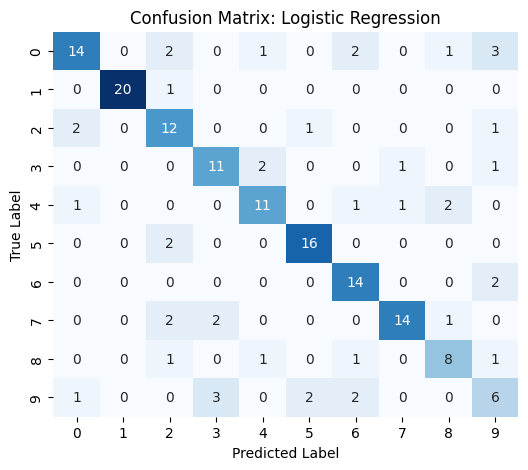

In [42]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['liblinear','newton-cg', 'lbfgs']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('classifier', logistic_regression)
])

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print best parameters and best cross-validation accuracy
print(f"\nBest parameters for Logistic Regression: {best_params}")
print(f"Best cross-validation accuracy for Logistic Regression: {best_score:.5f}")

# Fit the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Perform Leave-One-Out cross-validation
loo = LeaveOneOut()
loo_scores = cross_val_score(best_model, X, y, cv=loo)
loo_accuracy = np.mean(loo_scores)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out results
print(f"\nAccuracy on Test Set: {accuracy:.5f}")
print(f"Leave-One-Out (LOO) Accuracy: {loo_accuracy:.5f}")
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(conf_matrix, 'Logistic Regression')


#### Results after Hyperparameter Tuning of Logistic Regression

After hyperparameter tuning, the optimal configuration for the Logistic Regression model was identified as **\( C = 0.1 \)** with the **'newton-cg'** solver. This configuration achieved the best cross-validation accuracy of **72.28%**. When applied to the test set, the tuned model attained an improved accuracy of **74.12%**, along with a **leave-one-out (LOO) accuracy of 72.99%**. These results indicate a slight improvement in the model’s generalizability and accuracy over the initial baseline, supporting the effectiveness of hyperparameter tuning in refining model performance.

In terms of precision, recall, and F1-score, the tuned Logistic Regression model demonstrated balanced performance across various classes, with a **weighted average F1-score of 0.74**. The following are notable observations by class:

- **High Precision and Recall for Class 1**: Class 1 maintained perfect precision (1.00) and high recall (0.95), achieving an almost ideal F1-score of 0.98, indicating that the model consistently identified instances of this class with minimal false positives and false negatives.
- **Moderate Performance for Majority of Classes**: Classes such as 3, 5, and 7 displayed robust F1-scores (0.71, 0.86, and 0.80, respectively), reflecting balanced detection capability. Precision and recall metrics for these classes indicate the model’s effective handling of these categories without overfitting.
- **Room for Improvement in Minority Classes**: Some classes, such as 9, showed lower precision, recall, and F1-scores (0.43), suggesting that the model faces challenges in detecting these categories accurately, potentially due to fewer samples or higher variability in features.

In summary, the tuned Logistic Regression model demonstrates improved accuracy and balanced performance across most classes.
